In [4]:
from knowknow import *

from load_db import db as dta

loading variable sociology-wos-74b/groups from disk
loading variable sociology-wos-74b/group_reps from disk
loading variable sociology-wos-74b/_attributes from disk


In [3]:
top_df = stats.top_decade_stratified(dta, 'c', topN=20, maxP = 0.1, debug=False, yRange=(1940,2015))

loading variable sociology-wos-74b/ind ___ c.fy from disk
loading variable sociology-wos-74b/ind ___ fy from disk
(106, 12)


In [4]:
top_df.head()

,type,maxcounty,first,maxcount,last,maxprop,total,maxpropy,name,totalprop,first_added,pub
0,book,1997,1985,37,2015,0.001511,702,1989,"Giddens, A.|constitution soc",0.022710,1985,NaN
1,book,1954,1935,5,2014,0.032258,94,1935,"Moreno, J.|who shall survive",0.208658,1940,NaN
2,book,2014,1940,35,2015,0.011976,896,1944,"Weber, M.|protestant ethic spi",0.109743,1963,NaN
3,book,1988,1965,32,2015,0.002714,766,1974,"Kuhn, T.|structure sci revolu",0.045963,1966,NaN
4,book,2011,1966,35,2015,0.002241,1071,1973,"Berger, P.|social construction",0.051238,1967,NaN


In [29]:
dd = {}

In [241]:
def key2name(tname, truncate=None):
    tstr = tname.split("|")
    if len(tstr) == 3:
        tstr = "%s (%s)\n%s" % (tstr[0], tstr[1], tstr[2])
    else:
        if tname in dd:
            yy = dd[tname][2]
        else:
            yy = dta.trend('c', tname).first
        tstr = "%s (%s)\n%s" % (tstr[0], yy, tstr[1])
    tstr = tstr.lower()
    return tstr

In [237]:
NCOLS=2
NPAGES=None
markranges={}
yearlim=(1950,2015)
tickstep=20
print_names={}
number_start=1

In [238]:
names = sorted(top_df['name'])

yearlim=(1920,2015)
print_names= {k: key2name(k) for k in top_df['name']}
tickstep=30

In [239]:
print_numbers = False

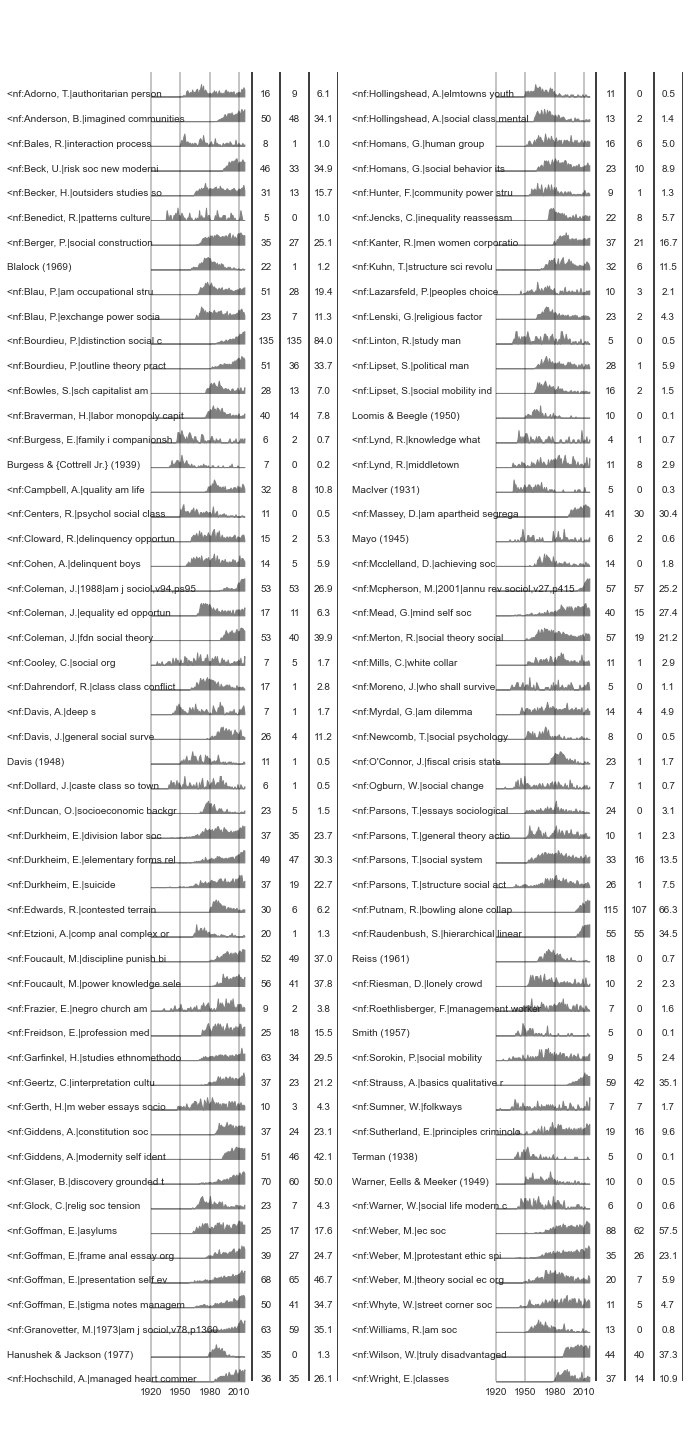

In [242]:
who = names


wper = 17 / 3
hper = 10 / 20
NROWS = (len(who) // NCOLS) + int(len(who) % NCOLS != 0)

top_end = (2080-2015) /  (2015-1950)
bottom_end = (1950 - 1880) / (2015 - 1950)
year_wid = yearlim[1] - yearlim[0]
yearmin, yearmax = yearlim

xmin, xmax = (yearlim[0] - bottom_end * year_wid, yearlim[1] + top_end * year_wid)
def dist_trans(nyears):
    return year_wid * nyears / (2015-1950)


plt.figure(figsize=(wper * NCOLS, hper * NROWS))

for col_i in range(NCOLS):

    plt.subplot(1, NCOLS, col_i + 1)

    trends = []
    for i, tname in enumerate(who[col_i * NROWS: (col_i + 1) * NROWS]):
        tt = np.array(dta.trend('c', tname).cits(yearmin, yearmax))

        #print(yearmin,yearmax)
        trends.append((tname, tt))

    for i, (tname, tt) in enumerate(trends):
        ttm = tt.max()
        ttl = tt[-1]
        ttl15 = tt[-15:].mean()

        BASE = (NROWS - 1 - i) * 2

        tt = tt / ttm
        tt = tt + BASE

        years = range(yearmin, yearmax+1)

        plt.axis('off')
        plt.fill_between(years, tt, y2=BASE, color='gray')

        if tname in print_names:
            tstr = print_names[tname]
        else:
            tstr = key2name(tname, truncate=25)

        tstr = "(%s) " % ((col_i) * NROWS + i + number_start) * print_numbers + tstr
        plt.text(yearmin - dist_trans(1950-1850), BASE, tstr)
        plt.text(yearmax + dist_trans(2030-2015), BASE, int(ttm), horizontalalignment='center')
        plt.text(yearmax + dist_trans(2050-2015), BASE, int(ttl), horizontalalignment='center')
        plt.text(yearmax + dist_trans(2070-2015), BASE, "%0.1f" % ttl15, horizontalalignment='center')
        # plt.text(2025, i*2, int(ttm), horizontalalignment='center')

        if tname in markranges:
            #xmin,xmax = plt.xlim()
            ymin,ymax = [BASE,BASE+1.4]
            mk = markranges[tname]
            plt.fill_between( mk, [ymin,ymin], [ymax,ymax], color='blue', alpha=0.2 )

    plt.vlines(range(yearmin, yearmax, tickstep), 0, NROWS * 2, color='black', alpha=0.3)

    # table lines...
    plt.vlines([ yearmax + dist_trans(DD-2015) for DD in range(2020, 2080 + 20, 20)], 0, NROWS * 2, color='black', alpha=1)  # table lines

    for y in range(yearmin, yearmax, tickstep):
        plt.text(y, -1, y, horizontalalignment='center')

    plt.xlim(xmin, xmax)


In [84]:
NCOLS = 3

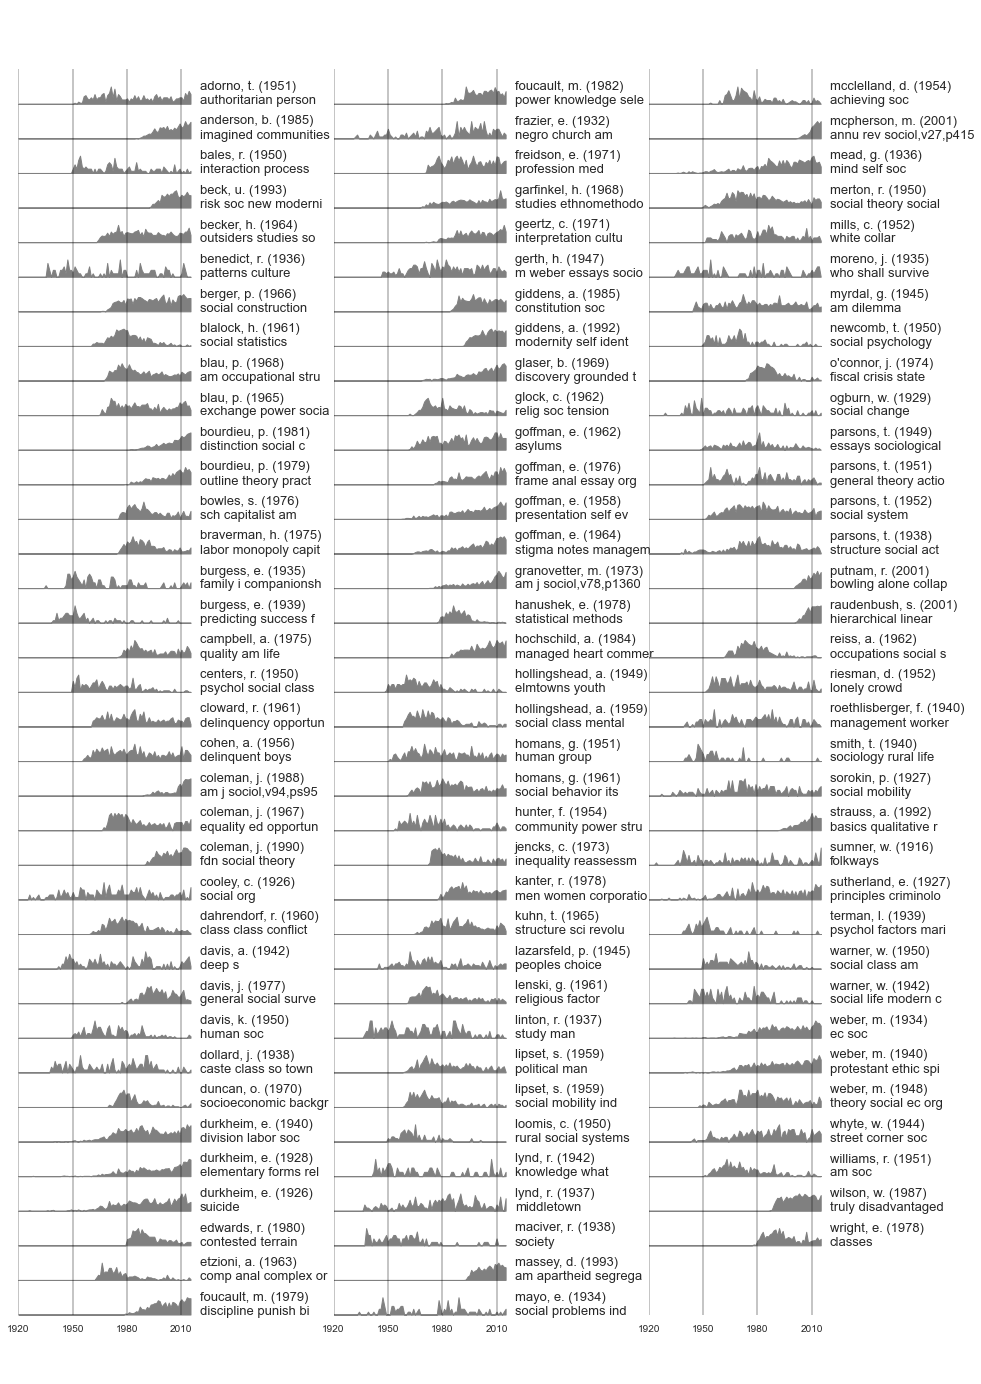

In [85]:
who = names


wper = 16 / 3
hper = 14 / 20
NROWS = (len(who) // NCOLS) + int(len(who) % NCOLS != 0)

#top_end = (2080-2015) /  (2015-1950)
#bottom_end = (1950 - 1880) / (2015 - 1950)
#year_wid = yearlim[1] - yearlim[0]
#yearmin, yearmax = yearlim

#xmin, xmax = (yearlim[0] - bottom_end * year_wid, yearlim[1] + top_end * year_wid)
#def dist_trans(nyears):
#    return year_wid * nyears / (2015-1950)


plt.figure(figsize=(wper * NCOLS, hper * NROWS))

for col_i in range(NCOLS):

    plt.subplot(1, NCOLS, col_i + 1)

    trends = []
    for i, tname in enumerate(who[col_i * NROWS: (col_i + 1) * NROWS]):
        tt = np.array(dta.trend('c', tname).cits(yearmin, yearmax))

        #print(yearmin,yearmax)
        trends.append((tname, tt))

    for i, (tname, tt) in enumerate(trends):
        ttm = tt.max()
        ttl = tt[-1]
        ttl15 = tt[-15:].mean()

        BASE = (NROWS - 1 - i) * 2

        tt = tt / ttm
        tt = tt + BASE

        years = range(yearmin, yearmax+1)

        plt.axis('off')
        plt.fill_between(years, tt, y2=BASE, color='gray')

        if tname in print_names:
            tstr = print_names[tname]
        else:
            tstr = key2name(tname, truncate=25)

        tstr = "(%s) " % ((col_i) * NROWS + i + number_start) * print_numbers + tstr
        plt.text(2020, BASE, tstr, fontsize=13)
        #plt.text(yearmax + dist_trans(2030-2015), BASE, int(ttm), horizontalalignment='center')
        #plt.text(yearmax + dist_trans(2050-2015), BASE, int(ttl), horizontalalignment='center')
        #plt.text(yearmax + dist_trans(2070-2015), BASE, "%0.1f" % ttl15, horizontalalignment='center')
        # plt.text(2025, i*2, int(ttm), horizontalalignment='center')

        if tname in markranges:
            #xmin,xmax = plt.xlim()
            ymin,ymax = [BASE,BASE+1.4]
            mk = markranges[tname]
            plt.fill_between( mk, [ymin,ymin], [ymax,ymax], color='blue', alpha=0.2 )

    plt.vlines(range(yearmin, yearmax, tickstep), 0, NROWS * 2, color='black', alpha=0.3)

    # table lines...
    #plt.vlines([ yearmax + dist_trans(DD-2015) for DD in range(2020, 2080 + 20, 20)], 0, NROWS * 2, color='black', alpha=1)  # table lines

    for y in range(yearmin, yearmax, tickstep):
        plt.text(y, -1, y, horizontalalignment='center')

    plt.xlim(yearmin, yearmax + 50)

In [91]:
from importlib import reload
import knowknow
reload(knowknow.viz)
from knowknow.viz import yearly_counts_table_simp

In [118]:
def key2name(tname, truncate=None):
    tstr = tname.split("|")
    if len(tstr) == 3:
        tstr = "%s (%s)\n%s" % (tstr[0], tstr[1], tstr[2])
    else:
        if tname in dd:
            yy = dd[tname][2]
        else:
            yy = str(dta.trend('c', tname).first) + "*"
        tstr = "%s (%s)\n%s" % (tstr[0], yy, tstr[1])
    tstr = tstr.lower()
    return tstr

In [119]:
mk = {r['name']:(r.first_added,r.first_added+10) for i,r in top_df.iterrows()}

In [120]:
len(names)

106

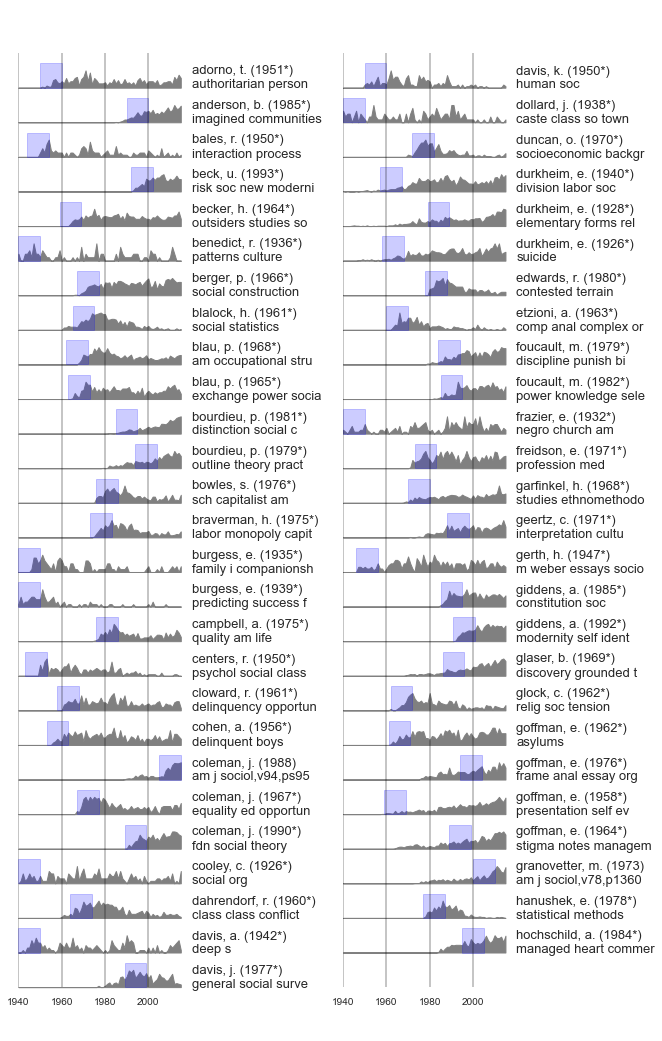

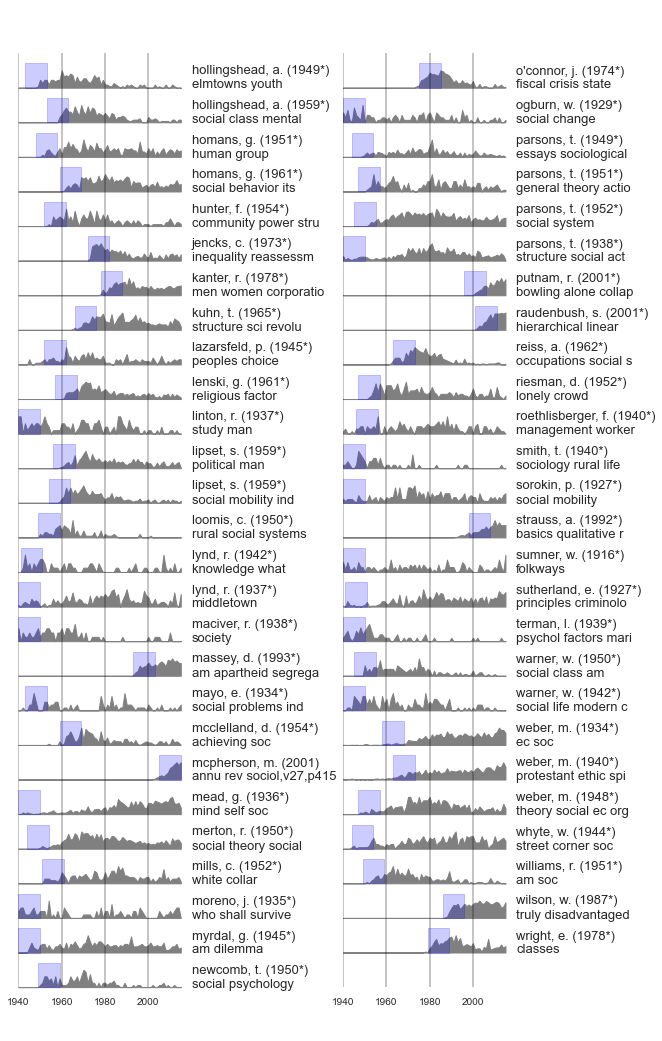

In [159]:
NPAGES = 2
nper = len(names) // NPAGES + int(len(names)%NPAGES != 0)
for i in range(NPAGES):
    mynames = names[i*nper:(i+1)*nper]
    knowknow.viz.yearly_counts_table_simp(dta, mynames, NCOLS=2, print_names={k:key2name(k) for k in mynames}, markranges=mk, yearlim=(1940,2015))
    plt.savefig('top20.longer.%s.png'%i)

In [105]:
without_many_now = []
total = 0

for n in names:
    t = dta.trend('c', n)
    tot = t.sum_between(2000,2015)
    if t.first >= 1960:
        continue
        
    total += 1
    if tot < 10:
        without_many_now.append(n)
        continue

In [106]:
total

56

In [107]:
len(without_many_now)

11

In [108]:
11/56

0.19642857142857142

In [116]:
parts = []
for x in without_many_now:
    tt = dta.trend('c', x)
    c = tt.sum_between(2000,2015)
    parts.append( "%s (%s)" % (
        x.split(",")[0],
        "%s; %s citation%s" %(
            'd',
            c,
            "s" if c > 1 else "",
            #tt.first # , first cited in %s
        )
    ) )

In [117]:
", ".join(parts)

'Burgess (d; 4 citations), Centers (d; 8 citations), Davis (d; 9 citations), Dollard (d; 9 citations), Hollingshead (d; 8 citations), Linton (d; 8 citations), Loomis (d; 1 citation), Maciver (d; 6 citations), Newcomb (d; 7 citations), Smith (d; 1 citation), Terman (d; 3 citations)'

# which were "late bloomers" kinda

In [186]:
top_df.shape

(106, 12)

In [184]:
top_df[top_df.first_added - np.clip(top_df['first'], 1940, 2020) >= 10].shape

(14, 12)

In [185]:
top_df[top_df.first_added - np.clip(top_df['first'], 1940, 2020) >= 20]

,maxcount,maxpropy,first,last,totalprop,name,maxprop,total,type,maxcounty,first_added,pub
14,50,1967,1964,2015,0.042893,"Goffman, E.|stigma notes managem",0.001985,957,book,2014,1989,NaN
53,35,1944,1940,2015,0.109743,"Weber, M.|protestant ethic spi",0.011976,896,book,2014,1963,NaN
83,49,1928,1928,2015,0.140028,"Durkheim, E.|elementary forms rel",0.052632,979,book,2014,1979,NaN
85,63,2011,1973,2015,0.025434,"Granovetter, M.|1973|am j sociol,v78,p1360",0.001061,814,article,2011,2000,1973.0


# proportional recognition

In [122]:
len(names)

106

In [141]:
max(props)

0.012853470437017995

In [142]:
np.mean(props[-10:])

1.2617253810293596e-05

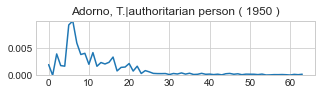

<Figure size 360x72 with 0 Axes>

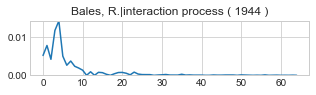

<Figure size 360x72 with 0 Axes>

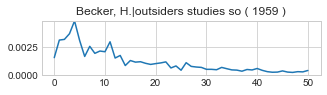

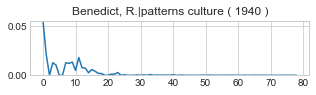

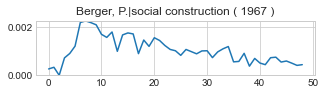

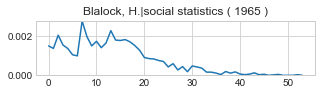

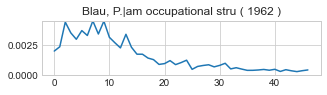

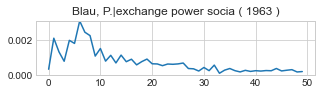

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

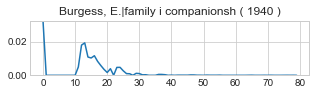

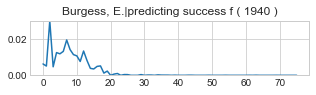

<Figure size 360x72 with 0 Axes>

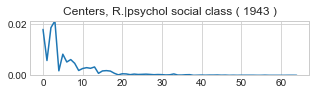

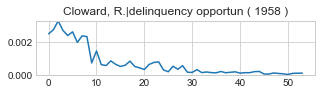

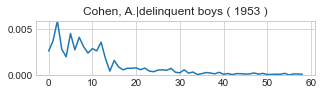

<Figure size 360x72 with 0 Axes>

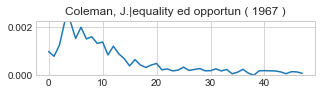

<Figure size 360x72 with 0 Axes>

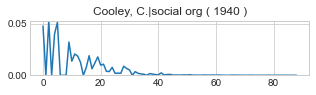

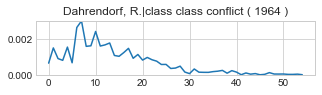

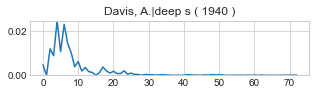

<Figure size 360x72 with 0 Axes>

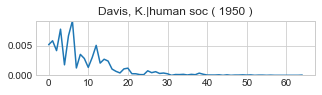

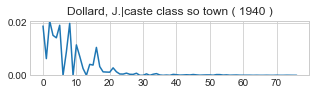

<Figure size 360x72 with 0 Axes>

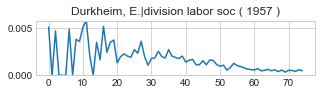

<Figure size 360x72 with 0 Axes>

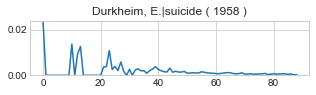

<Figure size 360x72 with 0 Axes>

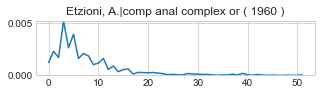

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

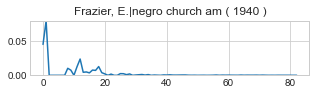

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

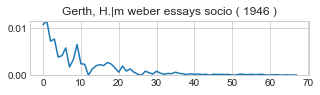

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

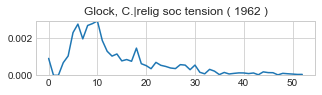

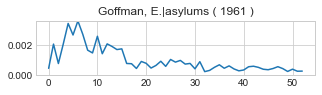

<Figure size 360x72 with 0 Axes>

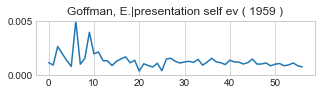

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

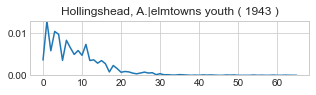

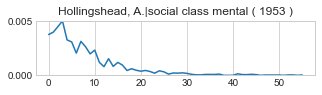

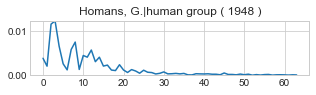

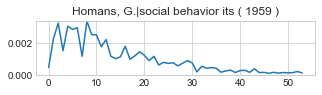

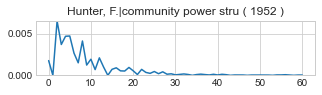

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

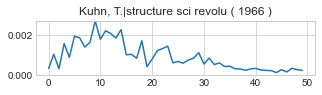

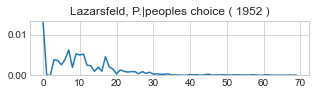

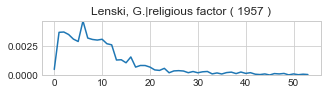

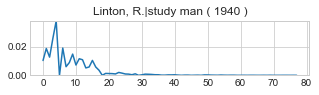

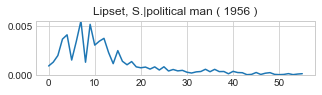

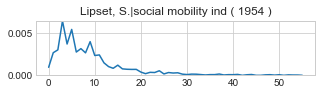

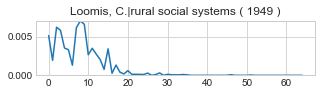

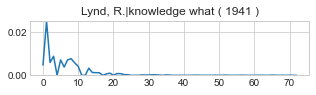

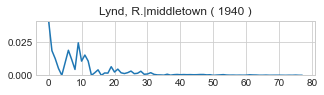

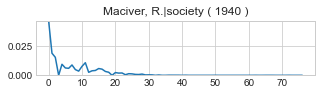

<Figure size 360x72 with 0 Axes>

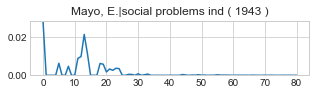

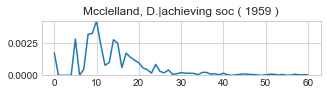

<Figure size 360x72 with 0 Axes>

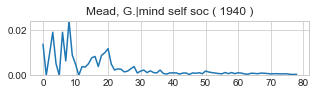

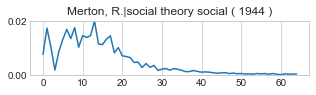

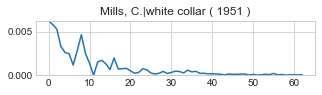

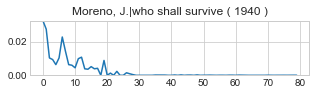

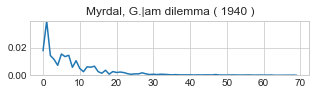

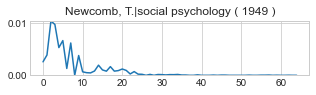

<Figure size 360x72 with 0 Axes>

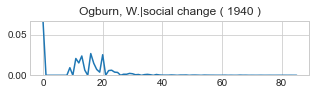

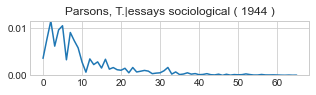

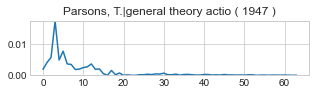

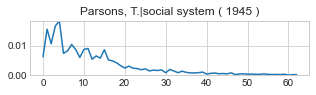

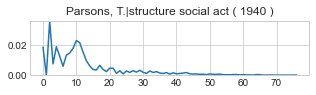

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

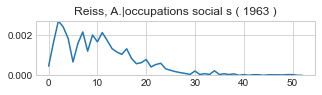

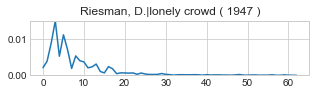

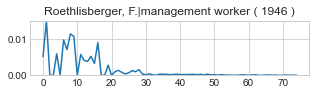

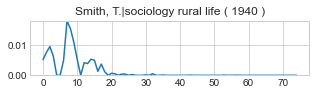

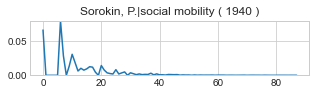

<Figure size 360x72 with 0 Axes>

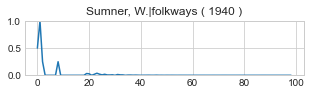

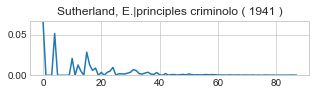

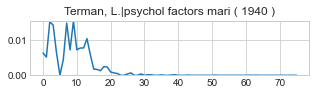

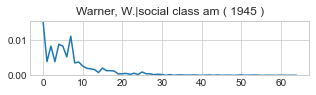

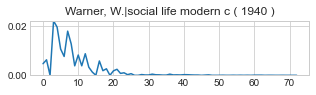

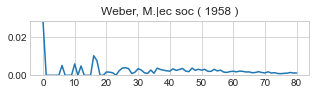

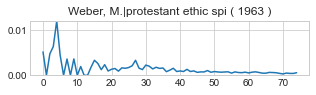

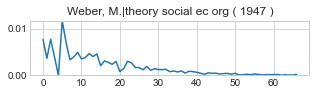

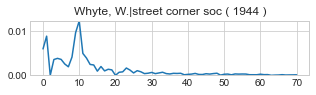

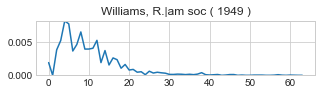

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

In [155]:
 for i,r in top_df.sort_values('name').iterrows():
    plt.figure(figsize=(5,1))
        
    if r.first_added >= 1970:
        continue
        
    t = dta.trend('c', r['name'])
    props = [t.cp[x] for x in range(t.first,2015)]
    
    #if np.mean(props[-10:]) / np.mean(props[-20:-10]) < 1/2:
    #    continue
    
    plt.plot( props )
    plt.title(r['name'] + " ( %s )"%r.first_added)
    
    plt.ylim( 0, max(props) )
    plt.show()

<Figure size 360x72 with 0 Axes>

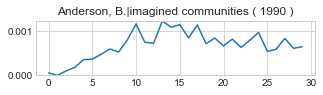

<Figure size 360x72 with 0 Axes>

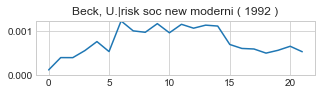

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

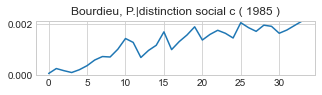

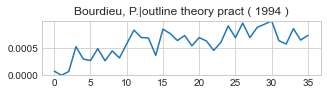

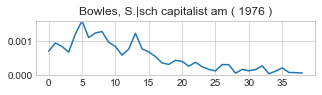

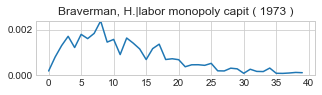

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

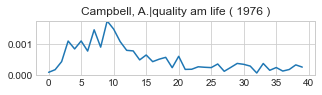

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

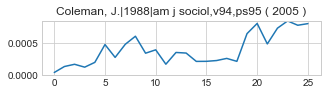

<Figure size 360x72 with 0 Axes>

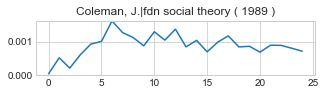

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

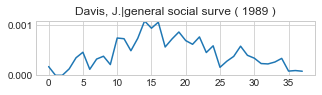

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

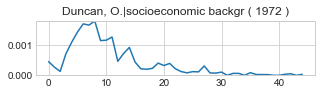

<Figure size 360x72 with 0 Axes>

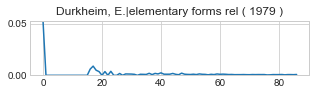

<Figure size 360x72 with 0 Axes>

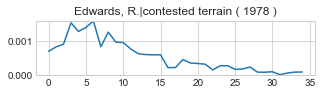

<Figure size 360x72 with 0 Axes>

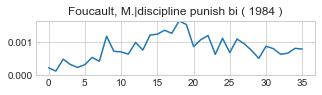

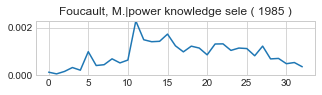

<Figure size 360x72 with 0 Axes>

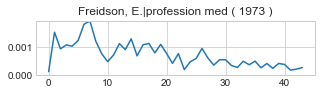

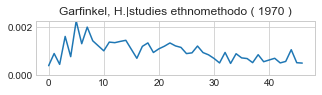

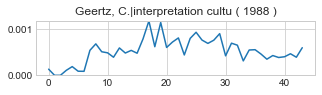

<Figure size 360x72 with 0 Axes>

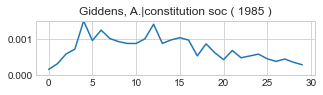

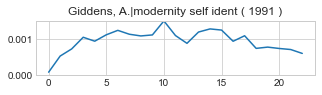

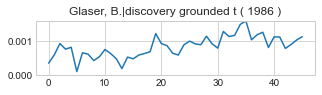

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

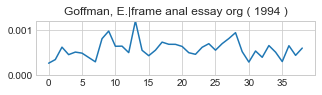

<Figure size 360x72 with 0 Axes>

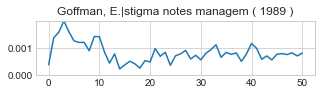

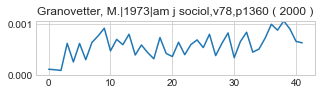

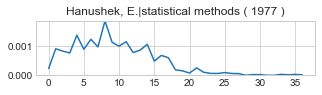

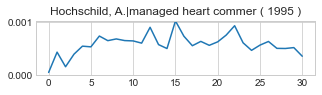

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

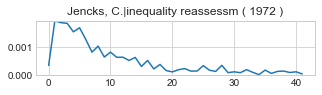

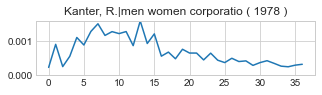

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

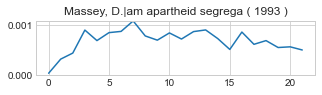

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

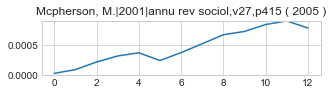

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

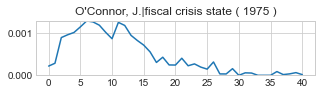

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

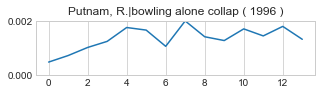

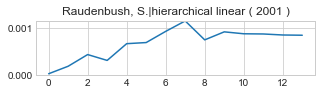

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

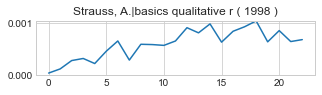

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

<Figure size 360x72 with 0 Axes>

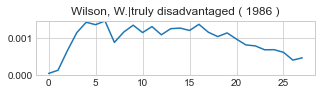

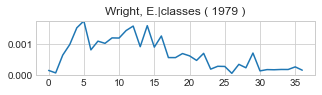

In [157]:
 for i,r in top_df.sort_values('name').iterrows():
    plt.figure(figsize=(5,1))
        
    if r.first_added < 1970:
        continue
        
    t = dta.trend('c', r['name'])
    props = [t.cp[x] for x in range(t.first,2015)]
    
    #if np.mean(props[-10:]) / np.mean(props[-20:-10]) < 1/2:
    #    continue
    
    plt.plot( props )
    plt.title(r['name'] + " ( %s )"%r.first_added)
    
    plt.ylim( 0, max(props) )
    plt.show()